PARTIE 1

In [57]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [58]:
modele = Sequential()

modele.add(Dense(2, input_dim=1, activation='relu'))
modele.add(Dense(1, activation='relu'))

In [59]:
import numpy as np

In [60]:
# Couche 0
coeff = np.array([[1.,-0.5]])
biais = np.array([-1,1])
poids = [coeff,biais]
modele.layers[0].set_weights(poids)

# Couche 1
coeff = np.array([[1.0],[1.0]])
biais = np.array([0])
poids = [coeff,biais]
modele.layers[1].set_weights(poids)

In [61]:
entree = np.array([[3.0]])
sortie = modele.predict(entree)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [62]:
import matplotlib.pyplot as plt

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


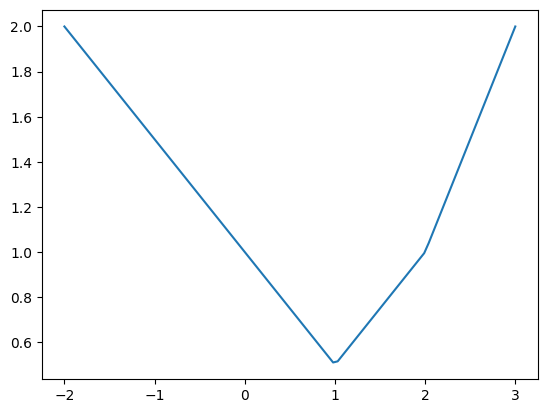

In [63]:
liste_x = np.linspace(-2, 3, num=100)
entree = np.array([[x] for x in liste_x])
sortie = modele.predict(entree)
liste_y = np.array([y[0] for y in sortie])
plt.plot(liste_x,liste_y)
plt.show()

In [64]:
from mpl_toolkits.mplot3d import Axes3D

In [65]:
# VX = np.linspace(-5, 5, 20)
# VY = np.linspace(-5, 5, 20)
# X,Y = np.meshgrid(VX, VY)
# entree = np.c_[X.ravel(), Y.ravel()]
# sortie = modele.predict(entree)
# Z = sortie.reshape(X.shape)
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, Z)
# plt.show()

PARTIE 2

In [66]:
def f(x):
    return np.cos(2*x) + x*np.sin(3*x) + x**0.5 - 2

In [67]:
a, b = 0, 5
N = 100
X = np.linspace(a, b, N)
Y = f(X)
X_train = X.reshape(-1, 1)
Y_train = Y.reshape(-1, 1)

In [68]:
from tensorflow.keras.optimizers import Adam

In [69]:
reseau = Sequential()

c = 5
p = 10
pas = 0.001
ep = 1000

reseau.add(Dense(p, input_dim=1, activation='tanh'))
for i in range(c):
    reseau.add(Dense(p, activation='tanh'))
reseau.add(Dense(1, activation='linear'))

reseau.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=pas))
print(reseau.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 581 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

None


In [70]:
random_weights = [np.random.normal(size=w.shape) for w in reseau.get_weights()]
reseau.set_weights(random_weights)

In [ ]:
history = reseau.fit(X_train, Y_train, epochs=ep)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.2614
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.8670  
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.0864  
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.3693
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.8531
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.1303 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.7122  
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.0914  
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 7.5606
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4159  
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 6.0181
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6033  
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5235  
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.0015  
Epoch 15/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - los

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


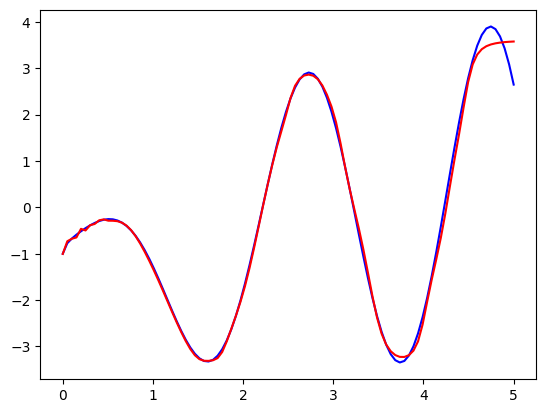

In [72]:
Y_predict = reseau.predict(X_train)
plt.plot(X_train, Y_train, color='blue')
plt.plot(X_train, Y_predict, color='red')
plt.show()

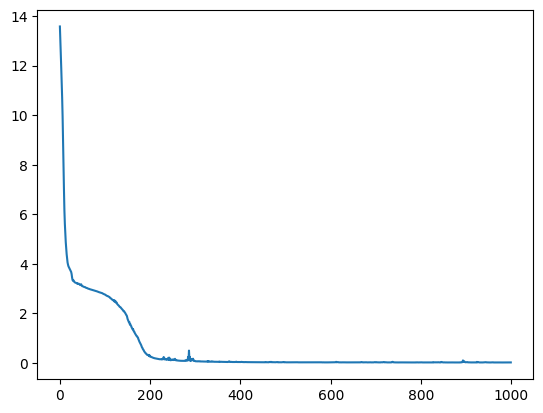

In [73]:
plt.plot(history.history['loss'])
plt.show()

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.0513  
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3836
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1428  
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0817  
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6063  
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2647  
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8260  
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6348  
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7807  
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3967  
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7935  
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1078  
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0467  
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6159 
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5

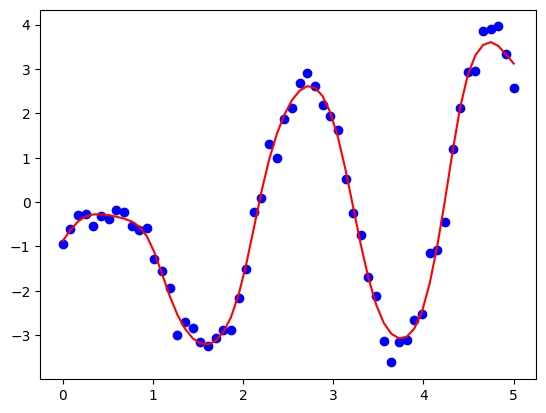

In [91]:
def gaussnoise(mu, sigma, size):
    return np.random.normal(mu, sigma, size)
# Création du jeu de données
a, b = 0, 5
N = 60
X = np.linspace(a, b, N)
#print(X)
Y = f(X)
Ynoisy=f(X)+gaussnoise(0,0.3,N)
#print(Y)
X_train = X.reshape(-1,1)
Y_train = Ynoisy.reshape(-1,1)
# Tracer du nuage de points des données bruitées color='blue'
plt.plot(X_train, Y_train,"ob")

reseau = Sequential()
c = 3
p = 10
pas = 0.001
ep = 1000
reseau.add(Dense(p, input_dim=1, activation='tanh'))
for i in range(c):
    reseau.add(Dense(p, activation='tanh'))
reseau.add(Dense(1, activation='linear'))
reseau.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=pas))
random_weights = [np.random.normal(size=w.shape) for w in reseau.get_weights()]
reseau.set_weights(random_weights)
history = reseau.fit(X_train, Y_train, epochs=ep)
Y_predict = reseau.predict(X_train)
plt.plot(X_train, Y_predict, color='red')